# Visu 5: Profile along the edge for width computation

## Setup

In [78]:
import os
import unittest
from amftrack.util.sys import (
    update_plate_info_local,
    get_current_folders_local,
    test_path,
)
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment, Edge, Node
)
from amftrack.pipeline.functions.image_processing.extract_width_fun import (
    generate_pivot_indexes,
    compute_section_coordinates,
    find_source_images_filtered,
    extract_section_profiles_for_edge,
)
from amftrack.pipeline.functions.image_processing.experiment_util import get_random_edge, plot_edge
from amftrack.util.plot import pixel_list_to_matrix
from random import choice

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
directory = test_path + "/"  # TODO(FK): fix this error
plate_name = "20220330_2357_Plate19"
update_plate_info_local(directory)
folder_df = get_current_folders_local(directory)
selected_df = folder_df.loc[folder_df["folder"] == plate_name]
i = 0
plate = int(list(selected_df["folder"])[i].split("_")[-1][5:])
folder_list = list(selected_df["folder"])
directory_name = folder_list[i]
exp = Experiment(plate, directory)
exp.load(
    selected_df.loc[selected_df["folder"] == directory_name], labeled=False
)

analysed:   0%|          | 0/1 [00:00<?, ?it/s]

2022-03-30 23:57:00


## I/ Visualisation of Edge sections

In [50]:
edges = []
for i in range(3):
    edge = get_random_edge(exp, 0)
    edges.append(edge)

In [52]:
for i in range(3):
    print(len(edges[i].pixel_list(0)))

74
541
115


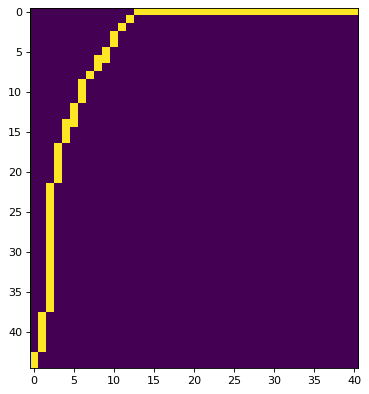

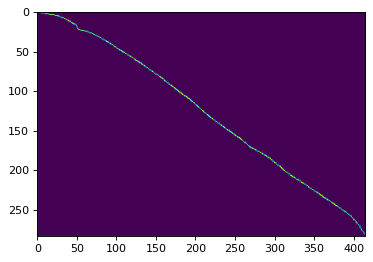

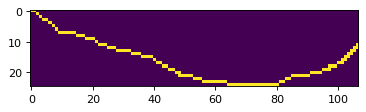

In [76]:
from matplotlib.pyplot import figure

for i in range(3):
    figure(figsize=(18, 6), dpi=80)
    plt.subplot(1, 3, i+1)
    plt.imshow(pixel_list_to_matrix(edges[i].pixel_list(0)))

In [60]:
results = []
for i in range(3):
    results.append(extract_section_profiles_for_edge(exp, 0, edges[i]))

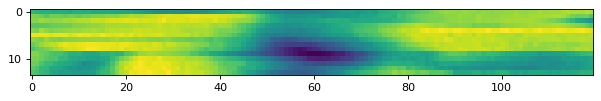

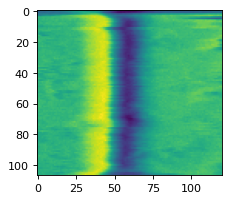

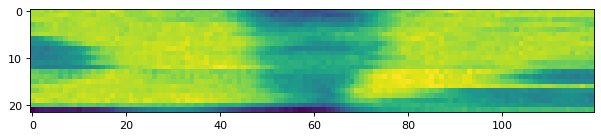

In [73]:
for i in range(3):
    figure(figsize=(20, 6), dpi=80)
    plt.subplot(2, 2, i+1)
    plt.imshow(results[i])

In [64]:
results[i].shape

(22, 120)

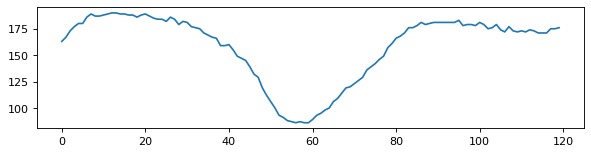

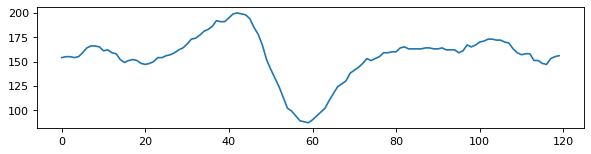

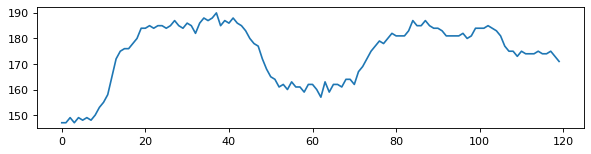

In [72]:
for i in range(3):
    index = results[i].shape[0]//2 # slice in the middle
    figure(figsize=(30, 2), dpi=80)
    plt.subplot(1, 3, i+1)
    plt.plot(results[i][index])

<IPython.core.display.Javascript object>


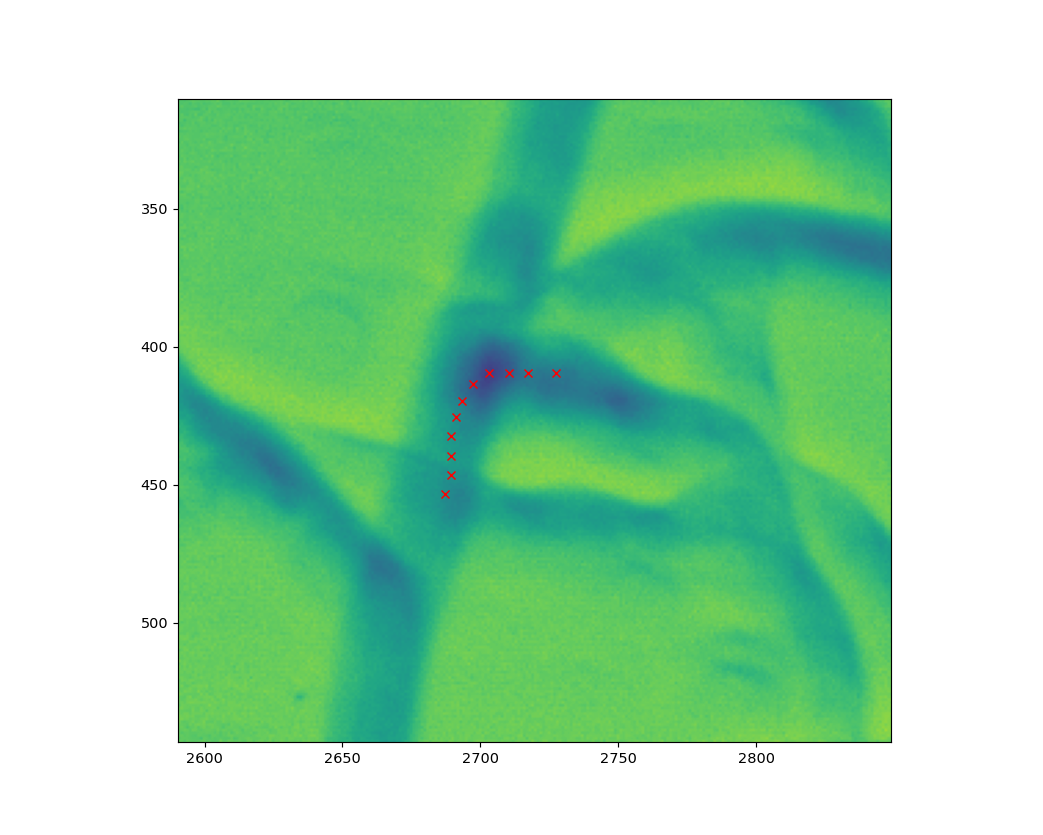

In [86]:
%matplotlib notebook
i = 0
figure(figsize=(10, 8), dpi=80)
plot_edge(edges[i], 0, mode=2)

<IPython.core.display.Javascript object>


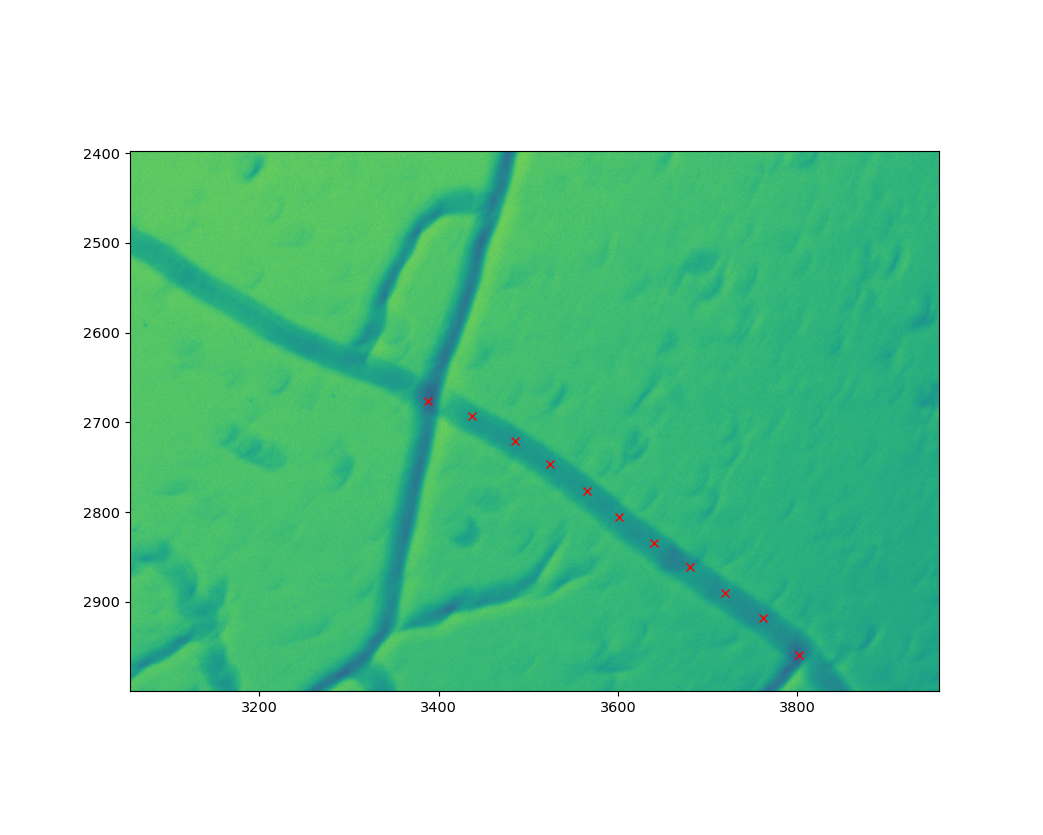

In [87]:
%matplotlib notebook
i = 1
figure(figsize=(10, 8), dpi=80)
plot_edge(edges[i], 0, mode=2)

<IPython.core.display.Javascript object>


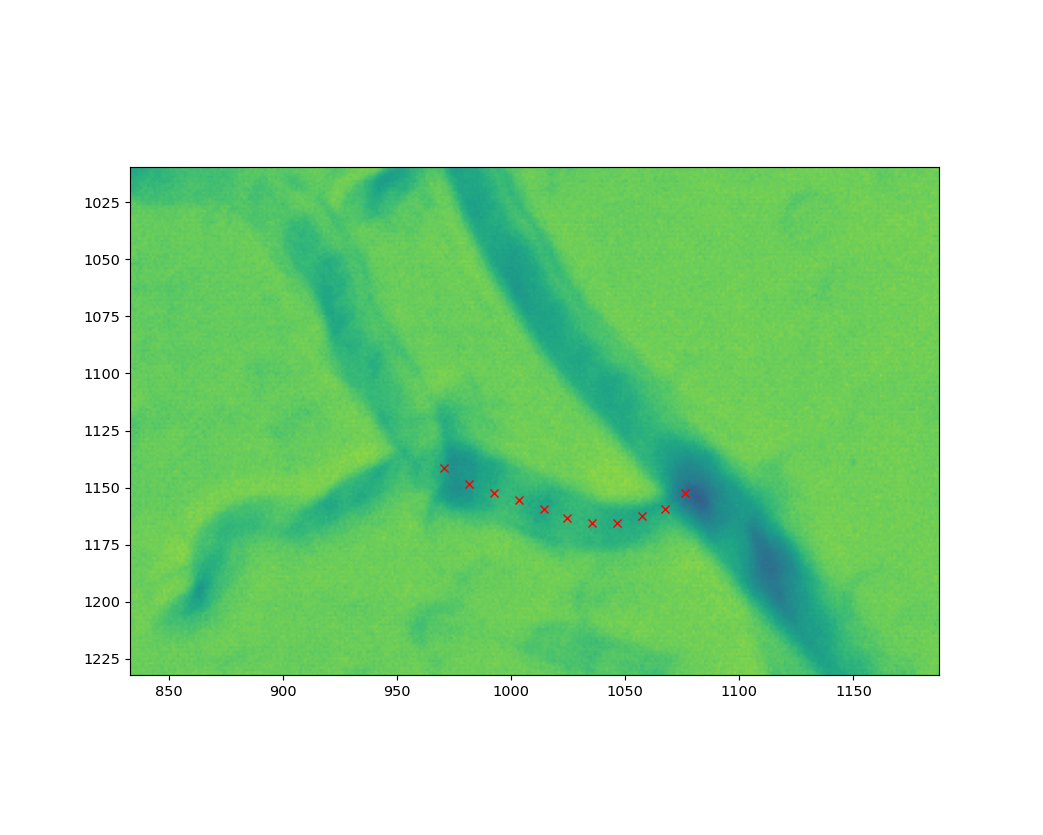

In [88]:
%matplotlib notebook
i = 2
figure(figsize=(10, 8), dpi=80)
plot_edge(edges[i], 0, mode=2)

## II/ Statistic on length of Edges

### Basic stats

In [38]:
def get_all_edges(exp, t):
    (G, pos) = exp.nx_graph[t], exp.positions[t]
    return [Edge(Node(edge_coord[0], exp), Node(edge_coord[1], exp), exp) for edge_coord in list(G.edges)]

In [39]:
a = get_all_edges(exp, 0)

In [40]:
def get_all_length(exp, t):
    a = get_all_edges(exp, t)
    return [len(a[i].pixel_list(0)) for i in range(len(a))]

In [41]:
l = np.array(get_all_length(exp, 0))

(array([33., 13.,  6.,  1.,  0.,  3.,  1.,  2.,  1.,  1.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

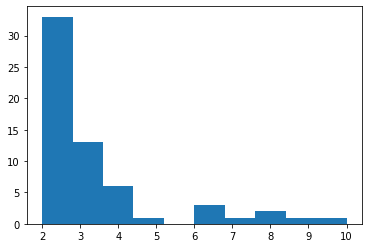

In [42]:
plt.hist(l, range=(2, 10))

(array([12., 10.,  9., 21., 15., 18., 15., 15., 12., 18.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <BarContainer object of 10 artists>)

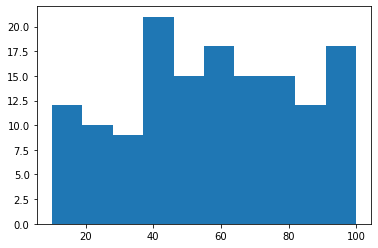

In [43]:
plt.hist(l, range=(10, 100))

(array([122.,  83., 102.,  51.,  37.,  34.,  22.,  18.,  13.,  20.,   9.,
         12.,   5.,   8.,   6.,   5.,   7.,   8.,   2.,   5.,   3.,   1.,
          4.,   4.,   7.,   2.,   1.,   2.,   2.,   3.,   2.,   0.,   0.,
          0.,   1.,   2.,   0.,   0.,   0.,   0.]),
 array([1.000000e+00, 5.097500e+01, 1.009500e+02, 1.509250e+02,
        2.009000e+02, 2.508750e+02, 3.008500e+02, 3.508250e+02,
        4.008000e+02, 4.507750e+02, 5.007500e+02, 5.507250e+02,
        6.007000e+02, 6.506750e+02, 7.006500e+02, 7.506250e+02,
        8.006000e+02, 8.505750e+02, 9.005500e+02, 9.505250e+02,
        1.000500e+03, 1.050475e+03, 1.100450e+03, 1.150425e+03,
        1.200400e+03, 1.250375e+03, 1.300350e+03, 1.350325e+03,
        1.400300e+03, 1.450275e+03, 1.500250e+03, 1.550225e+03,
        1.600200e+03, 1.650175e+03, 1.700150e+03, 1.750125e+03,
        1.800100e+03, 1.850075e+03, 1.900050e+03, 1.950025e+03,
        2.000000e+03]),
 <BarContainer object of 40 artists>)

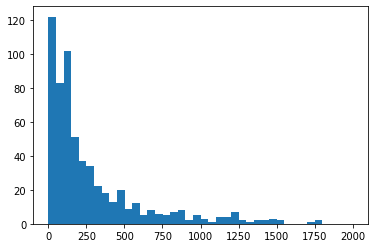

In [44]:
plt.hist(l, bins = 40, range = (1, 2000))

In [45]:
np.max(l)

4160

In [46]:
np.min(l)

2

In [47]:
np.sum(l==2)

33

In [48]:
np.sum(l==100)

2

### Proportion of network in each category

In [91]:
effectif = np.bincount(l)

In [92]:
weight = [effectif[i]*i for i in range(len(effectif))]

In [93]:
cum_weight = np.cumsum(weight)

In [94]:
cum_weight_normalized = cum_weight/np.max(cum_weight)

<IPython.core.display.Javascript object>


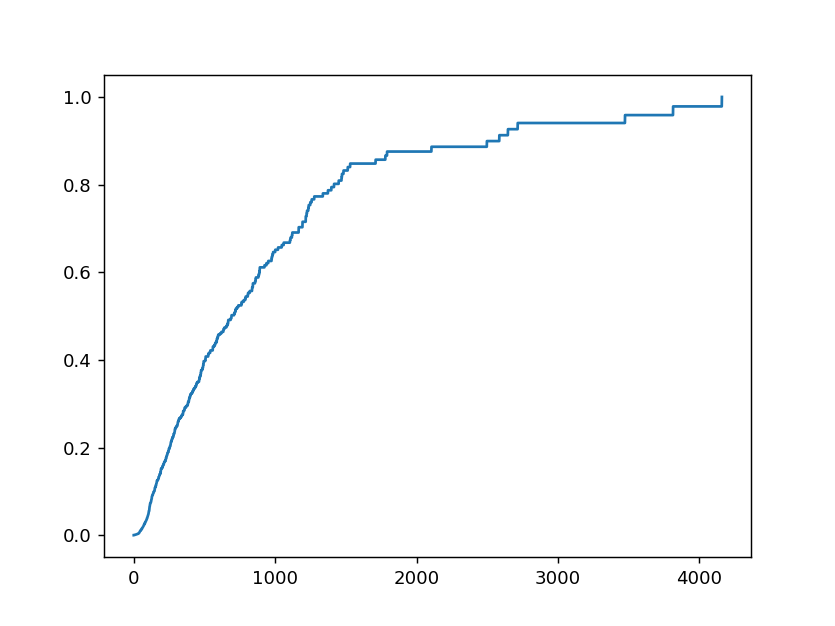

In [95]:
plt.plot(cum_weight_normalized)
#plt.xlim([2, 30])

### Find the lower bound

In [98]:
j = 0
while cum_weight_normalized[j]<0.05:
    j+=1
print(j)

105


In [99]:
j = 0
while cum_weight_normalized[j]<0.1:
    j+=1
print(j)

143


We still have 5% of the network length if we restrict to edges longer than 100 pixels in the pixel list